In [18]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
from subprocess import check_output
print(check_output(["ls","all"]).decode("utf8"))

sample_submission.csv
test.csv
train.csv



In [20]:
import tensorflow as tf
import pickle
from keras.utils.np_utils import to_categorical

In [21]:
train_data0 = pd.read_csv("all/train.csv")
print(train_data0.shape)
train_data = np.array(train_data0.iloc[:, 1:785])
train_label = np.array(train_data0.iloc[:,0])
print(train_data.shape)
print(train_label.shape)

(42000, 785)
(42000, 784)
(42000,)


In [22]:
train_label = to_categorical(train_label, num_classes=10)
print(train_label[:10,:])

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [23]:
test_data0 = pd.read_csv("all/test.csv")
print(test_data0.shape)

(28000, 784)


In [24]:
test_data = np.array(test_data0)
print(test_data.shape)

(28000, 784)


In [25]:
print(np.array(train_data0.iloc[:,0])[:10])
print('is equivalent to :')
print(train_label[:10])

[1 0 1 4 0 0 7 3 5 3]
is equivalent to :
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   5  60 136 136 147 254 255
 199 111  18   9   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0  25 152 253 253 253 253 253 253 253 253 253 124   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0 135 225 244 253 202 200
 181 164 216 253 253 211 151   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0  30 149  78   3   0   0   0  20 134 253 253 224   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  28 206 253 253 224   0   0   0   

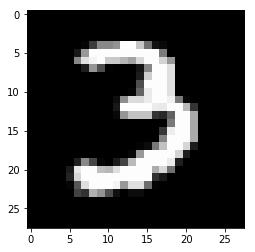

In [26]:
print(train_data[9])
pixels = train_data[9].reshape((28,28))
plt.imshow(pixels, cmap='gray')
plt.show()

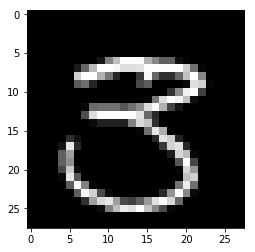

In [27]:
pixels = train_data[7].reshape((28,28))
plt.imshow(pixels, cmap='gray')
plt.show()

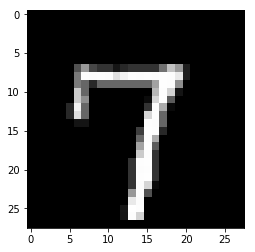

In [28]:
pixels = train_data[6].reshape((28,28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [29]:
learning_rate = 0.00005
epoch = 40
batch_size = 20

n_input = 784
n_classes = 10

X = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])

def conv2d(name, x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.elu(x, name=name)

def maxpool2d(name, x, k=2):
    return tf.nn.max_pool(x, ksize=[1,k,k,1], strides=[1,k,k,1], padding = 'SAME')

weights = {
    'W1' : tf.Variable(tf.truncated_normal([5,5,1,32], stddev=0.1)),
    'W2' : tf.Variable(tf.truncated_normal([5,5,32,64], stddev=0.1)),
    'W4' : tf.Variable(tf.truncated_normal([64*7*7,784],stddev=0.1)),
    'Wo' : tf.Variable(tf.truncated_normal([784,n_classes], stddev=0.1))
}
a = tf.Variable(1)
print(a)
print(tf.Variable(tf.truncated_normal([5,5,1,32],stddev=0.1)))

biases = {
    'b1' : tf.Variable(tf.random_normal([32],stddev=0.1)),
    'b2' : tf.Variable(tf.random_normal([64], stddev=0.1)),
    'b4' : tf.Variable(tf.random_normal([784], stddev=0.1)),
    'bo' : tf.Variable(tf.random_normal([n_classes], stddev=0.1))
}

<tf.Variable 'Variable_14:0' shape=() dtype=int32_ref>
<tf.Variable 'Variable_15:0' shape=(5, 5, 1, 32) dtype=float32_ref>


In [30]:
def model(X, weights , biases):
    x = tf.reshape(X, [-1,28,28,1]) #padding
    x = x/255 #normalization
    
    conv1 = tf.nn.relu(conv2d('conv1', x, weights['W1'], biases['b1'])) 
    pool1 = maxpool2d('pool1', conv1, k=2)
    drop1 = tf.layers.dropout(pool1, 0.7, True)
    
    conv2 = tf.nn.relu(conv2d('conv2',drop1,weights['W2'],biases['b2']))
    pool2 = maxpool2d('pool2',conv2,k=2)
    drop2 = tf.layers.dropout(pool2,0.7,True)
    
    fc = tf.reshape(pool2, [-1, weights['W4'].get_shape().as_list()[0]])
    fc = tf.add(tf.matmul(fc,weights['W4']), biases['b4'])
    fc = tf.nn.relu(fc)
    
    a = tf.add(tf.matmul(fc, weights['Wo']), biases['bo'])
    return a

In [31]:
pred = model(X, weights, biases)

In [32]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred, labels=y))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)
label = tf.argmax(pred,1)

In [33]:
correct_pred = tf.equal(label, tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [34]:
init = tf.global_variables_initializer()
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
with tf.Session(config=config) as sess:
    sess.run(init)
    for e in range(epoch):
        step = 1
        while step*batch_size <= train_data.shape[0]:
            xs, ys = train_data[(step-1)*batch_size:step*batch_size, :], train_label[(step-1)*batch_size:step*batch_size, :]
            sess.run(optimizer, feed_dict={X:xs, y:ys})
            
            if step % 100 == 0:
                loss, acc = sess.run([cost,accuracy], feed_dict={X:xs, y:ys})
                print("epoch {0}, Iter {1}, Minibatch Loss = {2}, Training accuracy = {3}".format(str(e), str(step),loss,acc))
                
            step += 1
    print("Optimization Completed")
    test_labels = []
    for i in range(1000):
        xs, ys = test_data[i*28:(i+1)*28, :], test_data[i*28:(i+1)*28, 0:10]
        pred_ = sess.run(label, feed_dict={X:xs, y:ys})
        test_labels.extend(list(pred_))
        
f1 = open('label','wb')
pickle.dump(test_labels, f1)
f1.close()

df = pd.DataFrame({'Label' : test_labels})
df1 = pd.concat([pd.Series(range(1,28001), name='ImageId'), df[['Label']]], axis=1)
df1.to_csv('ConvPool_X2.csv', index=False)
            
            

epoch 0, Iter 100, Minibatch Loss = 1.27325558662, Training accuracy = 0.649999976158
epoch 0, Iter 200, Minibatch Loss = 0.420457065105, Training accuracy = 0.899999976158
epoch 0, Iter 300, Minibatch Loss = 0.188418358564, Training accuracy = 1.0
epoch 0, Iter 400, Minibatch Loss = 0.394592136145, Training accuracy = 0.850000023842
epoch 0, Iter 500, Minibatch Loss = 0.189359307289, Training accuracy = 0.949999988079
epoch 0, Iter 600, Minibatch Loss = 0.392213612795, Training accuracy = 0.850000023842
epoch 0, Iter 700, Minibatch Loss = 0.0672271251678, Training accuracy = 1.0
epoch 0, Iter 800, Minibatch Loss = 0.0790810659528, Training accuracy = 1.0
epoch 0, Iter 900, Minibatch Loss = 0.0772839188576, Training accuracy = 1.0
epoch 0, Iter 1000, Minibatch Loss = 0.0337782502174, Training accuracy = 1.0
epoch 0, Iter 1100, Minibatch Loss = 0.0686651617289, Training accuracy = 1.0
epoch 0, Iter 1200, Minibatch Loss = 0.0580942258239, Training accuracy = 1.0
epoch 0, Iter 1300, Minib

epoch 4, Iter 2100, Minibatch Loss = 0.00102126295678, Training accuracy = 1.0
epoch 5, Iter 100, Minibatch Loss = 0.000874911434948, Training accuracy = 1.0
epoch 5, Iter 200, Minibatch Loss = 0.0197385083884, Training accuracy = 1.0
epoch 5, Iter 300, Minibatch Loss = 0.00168029346969, Training accuracy = 1.0
epoch 5, Iter 400, Minibatch Loss = 0.00538434181362, Training accuracy = 1.0
epoch 5, Iter 500, Minibatch Loss = 0.00605476740748, Training accuracy = 1.0
epoch 5, Iter 600, Minibatch Loss = 0.00154888839461, Training accuracy = 1.0
epoch 5, Iter 700, Minibatch Loss = 0.00783812440932, Training accuracy = 1.0
epoch 5, Iter 800, Minibatch Loss = 0.00248224870302, Training accuracy = 1.0
epoch 5, Iter 900, Minibatch Loss = 0.00166831165552, Training accuracy = 1.0
epoch 5, Iter 1000, Minibatch Loss = 0.00103256944567, Training accuracy = 1.0
epoch 5, Iter 1100, Minibatch Loss = 0.00332526420243, Training accuracy = 1.0
epoch 5, Iter 1200, Minibatch Loss = 0.000890120049007, Train

epoch 9, Iter 2000, Minibatch Loss = 0.000961897254456, Training accuracy = 1.0
epoch 9, Iter 2100, Minibatch Loss = 0.000351207330823, Training accuracy = 1.0
epoch 10, Iter 100, Minibatch Loss = 0.00013797050633, Training accuracy = 1.0
epoch 10, Iter 200, Minibatch Loss = 0.000927174813114, Training accuracy = 1.0
epoch 10, Iter 300, Minibatch Loss = 0.000477622408653, Training accuracy = 1.0
epoch 10, Iter 400, Minibatch Loss = 0.00104127754457, Training accuracy = 1.0
epoch 10, Iter 500, Minibatch Loss = 0.000250023556873, Training accuracy = 1.0
epoch 10, Iter 600, Minibatch Loss = 0.000252250407357, Training accuracy = 1.0
epoch 10, Iter 700, Minibatch Loss = 0.000808101147413, Training accuracy = 1.0
epoch 10, Iter 800, Minibatch Loss = 0.0009902685415, Training accuracy = 1.0
epoch 10, Iter 900, Minibatch Loss = 0.000296875601634, Training accuracy = 1.0
epoch 10, Iter 1000, Minibatch Loss = 0.000108092601295, Training accuracy = 1.0
epoch 10, Iter 1100, Minibatch Loss = 0.000

epoch 14, Iter 1800, Minibatch Loss = 9.10231174203e-05, Training accuracy = 1.0
epoch 14, Iter 1900, Minibatch Loss = 0.00122929620557, Training accuracy = 1.0
epoch 14, Iter 2000, Minibatch Loss = 0.000214397063246, Training accuracy = 1.0
epoch 14, Iter 2100, Minibatch Loss = 3.29466056428e-05, Training accuracy = 1.0
epoch 15, Iter 100, Minibatch Loss = 4.96544707858e-05, Training accuracy = 1.0
epoch 15, Iter 200, Minibatch Loss = 1.78603968379e-05, Training accuracy = 1.0
epoch 15, Iter 300, Minibatch Loss = 0.000141654149047, Training accuracy = 1.0
epoch 15, Iter 400, Minibatch Loss = 0.000278534862446, Training accuracy = 1.0
epoch 15, Iter 500, Minibatch Loss = 1.02040621641e-05, Training accuracy = 1.0
epoch 15, Iter 600, Minibatch Loss = 3.61364218406e-05, Training accuracy = 1.0
epoch 15, Iter 700, Minibatch Loss = 0.000156374109793, Training accuracy = 1.0
epoch 15, Iter 800, Minibatch Loss = 0.000276827224297, Training accuracy = 1.0
epoch 15, Iter 900, Minibatch Loss = 

epoch 19, Iter 1500, Minibatch Loss = 0.000144827383338, Training accuracy = 1.0
epoch 19, Iter 1600, Minibatch Loss = 7.94572042651e-05, Training accuracy = 1.0
epoch 19, Iter 1700, Minibatch Loss = 4.16628472522e-06, Training accuracy = 1.0
epoch 19, Iter 1800, Minibatch Loss = 1.19379747048e-05, Training accuracy = 1.0
epoch 19, Iter 1900, Minibatch Loss = 0.000357148237526, Training accuracy = 1.0
epoch 19, Iter 2000, Minibatch Loss = 5.03573864989e-05, Training accuracy = 1.0
epoch 19, Iter 2100, Minibatch Loss = 2.31263106798e-06, Training accuracy = 1.0
epoch 20, Iter 100, Minibatch Loss = 8.82671974978e-06, Training accuracy = 1.0
epoch 20, Iter 200, Minibatch Loss = 3.0544011679e-05, Training accuracy = 1.0
epoch 20, Iter 300, Minibatch Loss = 2.12387494685e-05, Training accuracy = 1.0
epoch 20, Iter 400, Minibatch Loss = 7.62954878155e-05, Training accuracy = 1.0
epoch 20, Iter 500, Minibatch Loss = 1.31061215143e-05, Training accuracy = 1.0
epoch 20, Iter 600, Minibatch Loss

epoch 24, Iter 1200, Minibatch Loss = 2.11593828681e-06, Training accuracy = 1.0
epoch 24, Iter 1300, Minibatch Loss = 9.51280162553e-05, Training accuracy = 1.0
epoch 24, Iter 1400, Minibatch Loss = 1.71063254584e-06, Training accuracy = 1.0
epoch 24, Iter 1500, Minibatch Loss = 4.85168266096e-06, Training accuracy = 1.0
epoch 24, Iter 1600, Minibatch Loss = 1.24088928715e-05, Training accuracy = 1.0
epoch 24, Iter 1700, Minibatch Loss = 7.09292805823e-07, Training accuracy = 1.0
epoch 24, Iter 1800, Minibatch Loss = 2.47356069849e-06, Training accuracy = 1.0
epoch 24, Iter 1900, Minibatch Loss = 0.000202585477382, Training accuracy = 1.0
epoch 24, Iter 2000, Minibatch Loss = 1.22185156215e-05, Training accuracy = 1.0
epoch 24, Iter 2100, Minibatch Loss = 1.19209254024e-07, Training accuracy = 1.0
epoch 25, Iter 100, Minibatch Loss = 3.28410942529e-06, Training accuracy = 1.0
epoch 25, Iter 200, Minibatch Loss = 4.55954750578e-06, Training accuracy = 1.0
epoch 25, Iter 300, Minibatch 

epoch 29, Iter 900, Minibatch Loss = 2.25897247219e-06, Training accuracy = 1.0
epoch 29, Iter 1000, Minibatch Loss = 3.63587332686e-07, Training accuracy = 1.0
epoch 29, Iter 1100, Minibatch Loss = 2.30664682022e-06, Training accuracy = 1.0
epoch 29, Iter 1200, Minibatch Loss = 2.23512643061e-06, Training accuracy = 1.0
epoch 29, Iter 1300, Minibatch Loss = 3.63456420018e-05, Training accuracy = 1.0
epoch 29, Iter 1400, Minibatch Loss = 2.56299756529e-07, Training accuracy = 1.0
epoch 29, Iter 1500, Minibatch Loss = 2.80141250641e-07, Training accuracy = 1.0
epoch 29, Iter 1600, Minibatch Loss = 6.246414614e-06, Training accuracy = 1.0
epoch 29, Iter 1700, Minibatch Loss = 3.27824722035e-07, Training accuracy = 1.0
epoch 29, Iter 1800, Minibatch Loss = 3.33182515533e-06, Training accuracy = 1.0
epoch 29, Iter 1900, Minibatch Loss = 2.1107516659e-05, Training accuracy = 1.0
epoch 29, Iter 2000, Minibatch Loss = 6.22854804533e-06, Training accuracy = 1.0
epoch 29, Iter 2100, Minibatch L

epoch 34, Iter 700, Minibatch Loss = 1.92519291886e-06, Training accuracy = 1.0
epoch 34, Iter 800, Minibatch Loss = 4.63715377919e-06, Training accuracy = 1.0
epoch 34, Iter 900, Minibatch Loss = 3.03983000549e-07, Training accuracy = 1.0
epoch 34, Iter 1000, Minibatch Loss = 2.62259874262e-07, Training accuracy = 1.0
epoch 34, Iter 1100, Minibatch Loss = 1.89539173334e-06, Training accuracy = 1.0
epoch 34, Iter 1200, Minibatch Loss = 9.71546228357e-07, Training accuracy = 1.0
epoch 34, Iter 1300, Minibatch Loss = 1.76637004188e-05, Training accuracy = 1.0
epoch 34, Iter 1400, Minibatch Loss = 6.55650893577e-08, Training accuracy = 1.0
epoch 34, Iter 1500, Minibatch Loss = 2.38418547127e-08, Training accuracy = 1.0
epoch 34, Iter 1600, Minibatch Loss = 2.92062452445e-07, Training accuracy = 1.0
epoch 34, Iter 1700, Minibatch Loss = 5.96046412227e-09, Training accuracy = 1.0
epoch 34, Iter 1800, Minibatch Loss = 1.71063823018e-06, Training accuracy = 1.0
epoch 34, Iter 1900, Minibatch 

epoch 39, Iter 600, Minibatch Loss = 5.12598148816e-07, Training accuracy = 1.0
epoch 39, Iter 700, Minibatch Loss = 9.35784214562e-07, Training accuracy = 1.0
epoch 39, Iter 800, Minibatch Loss = 1.40666145398e-06, Training accuracy = 1.0
epoch 39, Iter 900, Minibatch Loss = 8.94068961088e-08, Training accuracy = 1.0
epoch 39, Iter 1000, Minibatch Loss = 1.78813763796e-07, Training accuracy = 1.0
epoch 39, Iter 1100, Minibatch Loss = 1.71062401932e-06, Training accuracy = 1.0
epoch 39, Iter 1200, Minibatch Loss = 5.72201315663e-07, Training accuracy = 1.0
epoch 39, Iter 1300, Minibatch Loss = 1.96694983856e-07, Training accuracy = 1.0
epoch 39, Iter 1400, Minibatch Loss = 2.38418529364e-08, Training accuracy = 1.0
epoch 39, Iter 1500, Minibatch Loss = 5.78727576794e-06, Training accuracy = 1.0
epoch 39, Iter 1600, Minibatch Loss = 1.22188703244e-06, Training accuracy = 1.0
epoch 39, Iter 1700, Minibatch Loss = 0.0, Training accuracy = 1.0
epoch 39, Iter 1800, Minibatch Loss = 4.649149